In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
'''trainEvents is the list of all sound events across all training clips.
evalEvents is the list of all sound events across all eval clips.
displayNames is a table for Google's labeling scheme.
See https://research.google.com/audioset/download.html for more details.
'''

# trainEvents = pd.read_csv("audioset_train_strong.tsv", sep="\t")
# evalUnframed = pd.read_csv("audioset_eval_strong.tsv", sep="\t")
# evalEvents = pd.read_csv("audioset_eval_strong_framed_posneg.tsv", sep="\t")
displayNames = pd.read_csv("../data/mid_to_display_name.tsv", sep="\t",header=None)

trainFeaturesNew = pd.read_csv("../data/trainFeaturesNewSplit.csv")
trainTargetsNew = pd.read_csv("../data/trainTargetsNewSplit.csv")
evalFeaturesNew = pd.read_csv("../data/evalFeaturesNewSplit.csv")
evalTargetsNew = pd.read_csv("../data/evalTargetsNewSplit.csv")

traineventsbeforesplit = pd.read_csv("../data/trainEventsFiltered.csv")
evaleventsbeforesplit = pd.read_csv("../data/evalEventsFiltered.csv")

#split happens at index 10825 in evaleventsbeforesplit

trainEventsNew = pd.concat([evaleventsbeforesplit.iloc[:10824,:],traineventsbeforesplit])
trainEventsNew = evaleventsbeforesplit.iloc[10825:,:]
# evaleventsbeforesplit.loc[
#     (evaleventsbeforesplit.segment_id=="QejVyYvjrrs") & (evaleventsbeforesplit.start_time_seconds==3.84)]





In [3]:
trainFeaturesNew.head(10)

,Unnamed: 0,video_id,time_stamp,0,1,2,3,4,5,6,...,118,119,120,121,122,123,124,125,126,127
0,0,--PJHxphWEs,30.00,80,181,216,164,218,123,76,...,201,16,165,173,109,166,158,207,123,233
1,1,--PJHxphWEs,30.96,80,181,216,164,218,123,76,...,201,16,165,173,109,166,158,207,123,233
2,2,--PJHxphWEs,31.92,80,181,216,164,218,123,76,...,201,16,165,173,109,166,158,207,123,233
3,3,--PJHxphWEs,32.88,80,181,216,164,218,123,76,...,201,16,165,173,109,166,158,207,123,233
4,4,--PJHxphWEs,33.84,80,181,216,164,218,123,76,...,201,16,165,173,109,166,158,207,123,233
5,5,--PJHxphWEs,34.80,80,181,216,164,218,123,76,...,201,16,165,173,109,166,158,207,123,233
6,6,--PJHxphWEs,35.76,80,181,216,164,218,123,76,...,201,16,165,173,109,166,158,207,123,233
7,7,--PJHxphWEs,36.72,80,181,216,164,218,123,76,...,201,16,165,173,109,166,158,207,123,233
8,8,--PJHxphWEs,37.68,80,181,216,164,218,123,76,...,201,16,165,173,109,166,158,207,123,233
9,9,--PJHxphWEs,38.64,80,181,216,164,218,123,76,...,201,16,165,173,109,166,158,207,123,233


In [4]:
trainTargetsNew.head()

,Unnamed: 0,video_id,time_stamp,speech_present
0,0,--PJHxphWEs,30.00,False
1,1,--PJHxphWEs,30.96,False
2,2,--PJHxphWEs,31.92,False
3,3,--PJHxphWEs,32.88,False
4,4,--PJHxphWEs,33.84,False


In [5]:
trainEventsNew.head()

,Unnamed: 0,segment_id,start_time_seconds,end_time_seconds,label,present
10825,29842,QejVyYvjrrs,3.84,4.8,/m/02zsn,PRESENT
10826,29843,QejVyYvjrrs,3.84,4.8,/m/05tny_,NOT_PRESENT
10827,29844,QejVyYvjrrs,3.84,4.8,/m/068hy,NOT_PRESENT
10828,29845,QejVyYvjrrs,3.84,4.8,/m/07bjf,NOT_PRESENT
10829,29846,QejVyYvjrrs,3.84,4.8,/m/07ppn3j,NOT_PRESENT


In [6]:
numbersOfEvents = displayNames.copy().set_index(displayNames.columns[0])
trainEventsWorkspace = trainEventsNew.copy()
trainEventsWorkspace["event_time"] = trainEventsWorkspace.end_time_seconds - trainEventsWorkspace.start_time_seconds
trainEventsOnlyPresent = trainEventsNew.loc[trainEventsNew.present=="PRESENT"]
trainEventsValueCounts = trainEventsOnlyPresent.label.value_counts()


listOfTags=list(numbersOfEvents.index)
# print(listOfTags)

listOfEventCounts = []
listOfNames = []
listOfTotalTimes = []

for i in listOfTags:
    listOfNames.append(numbersOfEvents.loc[i].values[0])
    if i in trainEventsValueCounts.index:
        listOfEventCounts.append(trainEventsValueCounts.loc[i])
        listOfTotalTimes.append(trainEventsWorkspace.loc[(trainEventsWorkspace.label==i) & (trainEventsWorkspace.present=="PRESENT")].event_time.sum())
    else:
        listOfEventCounts.append(0)
        listOfTotalTimes.append(0)
        
eventsWithFreq = pd.DataFrame({"label":listOfTags,
                               "name":listOfNames,
                               "count":listOfEventCounts,
                               "total_time":listOfTotalTimes})
        
# #trainEvents.label.value_counts()
# #numbersOfEvents = numbersOfEvents.sort_values("number")


# totalTime = trainEventsNew.loc[trainEventsNew.present=="PRESENT"].copy()
# totalTime["time"] = totalTime["end_time_seconds"] - totalTime["start_time_seconds"]


# numbersOfEvents["total_time"] = 0
# for i in numbersOfEvents.index:
#     numbersOfEvents.loc[i,"total_time"] = totalTime[totalTime.label==i].time.sum()
# #totalTime[totalTime["label"]=="/m/03m9d0z"]

In [7]:
#print(listOfRealTags)
# print(listOfTags)
# print(listOfEvents)
eventsWithFreq.head()

,label,name,count,total_time
0,/g/11b630rrvh,Kettle whistle,0,0.00
1,/g/122z_qxw,Firecracker,115,110.40
2,/m/01280g,Wild animals,290,278.40
3,/m/012f08,Motor vehicle (road),751,720.96
4,/m/012n7d,Ambulance (siren),0,0.00


In [8]:
eventsWithFreq = eventsWithFreq.sort_values("total_time")

In [9]:
eventsWithFreq.head()

,label,name,count,total_time
0,/g/11b630rrvh,Kettle whistle,0,0.0
454,/t/dd00144,Alert,0,0.0
230,/m/07pt6mm,Grind,0,0.0
231,/m/07pt_g0,Pulse,0,0.0
236,/m/07pyf11,Flap,0,0.0


<Axes: xlabel='name'>

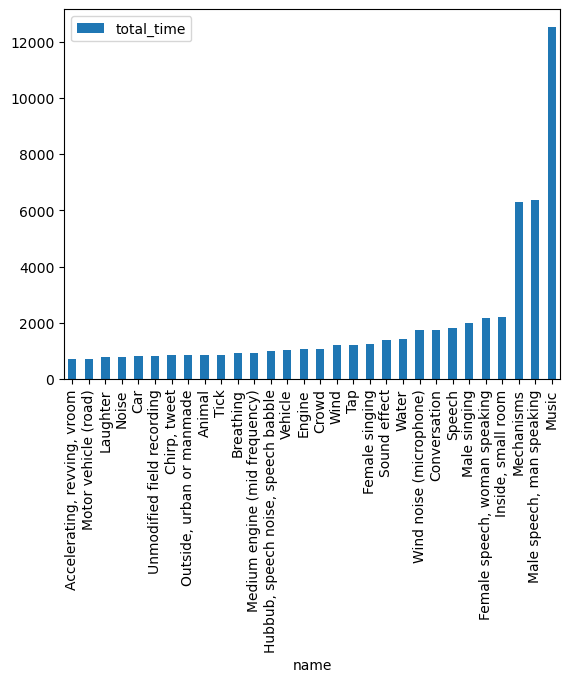

In [10]:
eventsWithFreq[-30:].plot.bar(x="name",y="total_time")

<Axes: xlabel='name'>

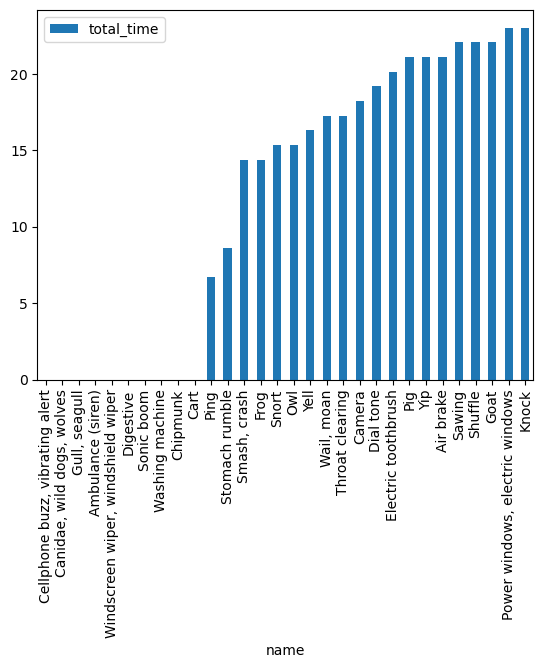

In [11]:
eventsWithFreq[90:120].plot.bar(x="name",y="total_time")

<Axes: xlabel='name'>

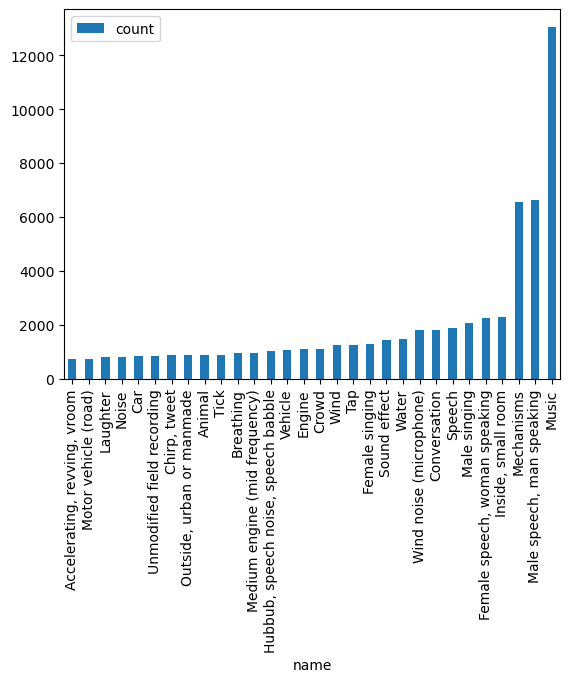

In [12]:
eventsWithFreq[-30:].plot.bar(x="name",y="count")

<Axes: xlabel='name'>

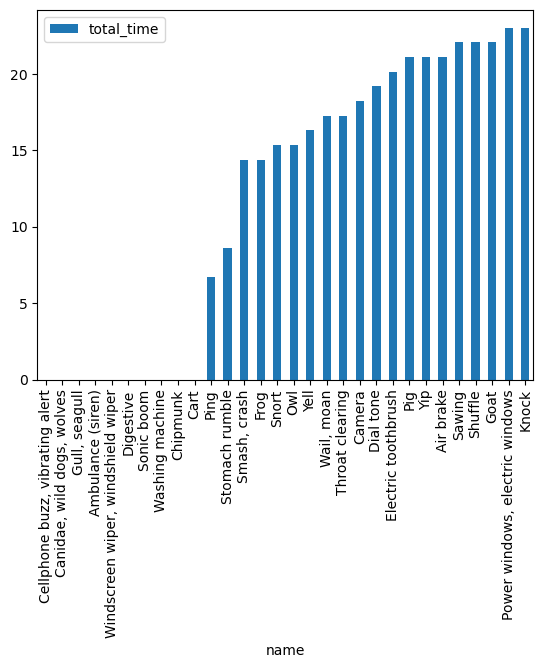

In [13]:
eventsWithFreq[90:120].plot.bar(x="name",y="total_time")

<Axes: xlabel='speech present?', ylabel='# of clips'>

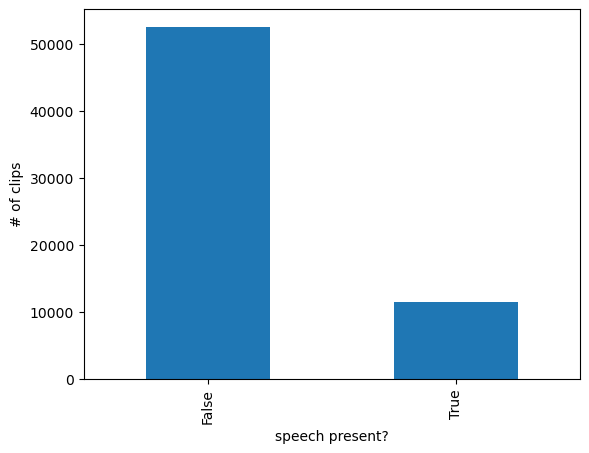

In [14]:
trainTargetsNew.speech_present.value_counts().plot.bar(xlabel="speech present?",ylabel="# of clips")

In [15]:
first_coord = trainFeaturesNew["0"].values
second_coord = trainFeaturesNew["1"].values

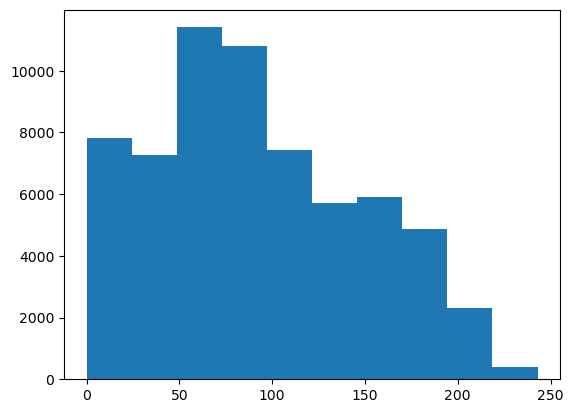

In [16]:
plt.figure()
plt.hist(first_coord)
plt.show()

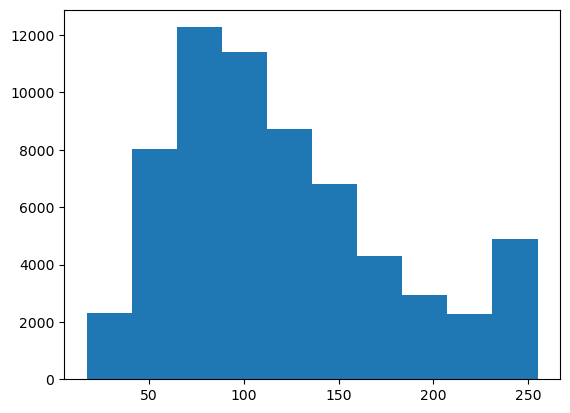

In [17]:
plt.figure()
plt.hist(second_coord)
plt.show()

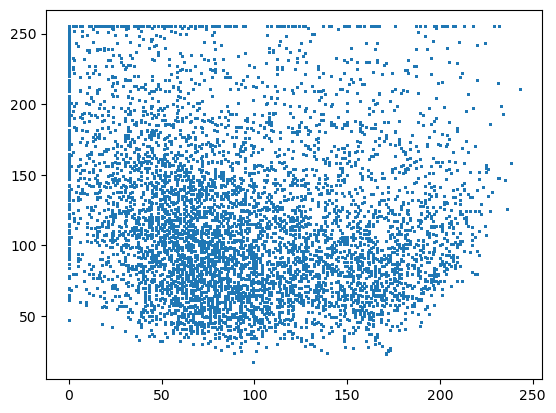

In [18]:


plt.figure()
plt.scatter(first_coord, second_coord, s=1)
plt.show()